In [12]:
import git
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from utils import *
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, Subtract
import datetime
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tf2_yolov4.anchors import YOLOV4_ANCHORS
from tf2_yolov4.model import YOLOv4

In [20]:
IMG_RES = 299
BATCH_SIZE = 16
ROOT_DIR = get_git_root(os.getcwd())
img_gen = ImageDataGenerator()
train_path = os.path.join(ROOT_DIR, 'datasets', 'stanford196', 'car_ims', 'train')
val_path = os.path.join(ROOT_DIR, 'datasets', 'stanford196', 'car_ims', 'val')

### Load images

In [21]:
train_gen = img_gen.flow_from_directory(train_path, target_size=(IMG_RES, IMG_RES),
                                        batch_size=BATCH_SIZE)
val_gen = img_gen.flow_from_directory(val_path, target_size=(IMG_RES, IMG_RES),
                                        batch_size=BATCH_SIZE)
labels = {value:key for key, value in train_gen.class_indices.items()}

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


In [5]:
trainX, trainY = val_gen.next()
trainX_int = trainX.astype(int)

In [17]:
recog_model = tf.keras.models.load_model(os.path.join(ROOT_DIR, 'models', 'EfB3-full-299-v2'))
detection_model = YOLOv4(
    input_shape=(960, 640, 3),
    anchors=YOLOV4_ANCHORS,
    num_classes=80,
    training=False,
    yolo_max_boxes=100,
    yolo_iou_threshold=0.5,
    yolo_score_threshold=0.5,
)
weights_path = os.path.join(ROOT_DIR, 'models', 'yolov4', 'yolov4.h5')
detection_model.load_weights(weights_path)

In [22]:
trainX.shape

(16, 299, 299, 3)

In [24]:
detection_model.predict(np.reshape(trainX, (BATCH_SIZE, 960, 640, 3)))

ValueError: cannot reshape array of size 4291248 into shape (16,960,640,3)

### Test precision

In [13]:
preds = model.predict(trainX)

In [18]:
real_indexes = np.array(tf.argmax(trainY, axis=1))
indexes = np.array(tf.argmax(preds, axis=1))

precision = 1-np.mean(real_indexes != indexes)
precision

1.0

### Test new image

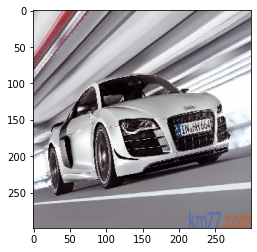

In [19]:
img = tf.keras.preprocessing.image.load_img('/home/messi/alvaro/Vehicle-Model-Recognition/test/Audi_R8_Coupe_2012/audi_r8.jpg',
                                           target_size=(IMG_RES, IMG_RES))
# img = tf.keras.preprocessing.image.load_img('/home/messi/alvaro/Vehicle-Model-Recognition/datasets/stanford196/car_ims_crop_mini/train/Aston Martin Virage Coupe 2012/000810.jpg',
#                                            target_size=(IMG_RES, IMG_RES))
img = np.array(img)
img = np.expand_dims(img, axis=0)
plt.imshow(img[0])

In [77]:
idx = tf.argmax(model.predict(img), axis=1)
idx = np.array(idx)
labels[int(idx)]

'Audi S5 Coupe 2012'

### Confidence

In [86]:
max(model.predict(img)[0])

0.98984796